## Final Project Submission

* Student name: Kezia Setokusumo
* Student pace: Self-Paced
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL:


In [1]:
# Import pandas library and housing dataset
import pandas as pd
data=pd.read_csv('kc_house_data.csv', index_col=0)

In [2]:
# Inspect data
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
# Inspect columns
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long'],
      dtype='object')

In [4]:
data=data.dropna()

In [5]:
data['yr_built'].describe()

count    30111.000000
mean      1975.162299
std         32.052930
min       1900.000000
25%       1953.000000
50%       1977.000000
75%       2003.000000
max       2022.000000
Name: yr_built, dtype: float64

In [6]:
data=data[data['yr_built']>=1980]
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.290200
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.071880
7137850210,4/28/2022,820000.0,3,2.5,2214,3506,2.0,NO,NO,NO,...,PUBLIC,2214,0,440,206,2019,0,"24913 122nd Place Southeast, Kent, Washington ...",47.378355,-122.178625
2944500680,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,NO,...,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320
2619950340,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,NO,...,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142050730,6/3/2022,1325000.0,5,3.5,3100,6428,2.0,NO,NO,NO,...,PUBLIC,3100,0,710,110,2018,0,"28910 Northeast 156th Street, Duvall, Washingt...",47.740145,-121.952390
9376300851,10/7/2021,719000.0,3,2.5,1270,1141,2.0,NO,NO,NO,...,PUBLIC,1050,420,200,60,2007,0,"8359 11th Avenue Northwest, Seattle, Washingto...",47.690440,-122.370620
194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.388510


In [7]:
# Make the data more interpretable later by subtracting the mean from 'sqft_living'
data['sqft_living']=data['sqft_living']-data['sqft_living'].mean()

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'sqft_garage'}>,
        <AxesSubplot:title={'center':'sqft_patio'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

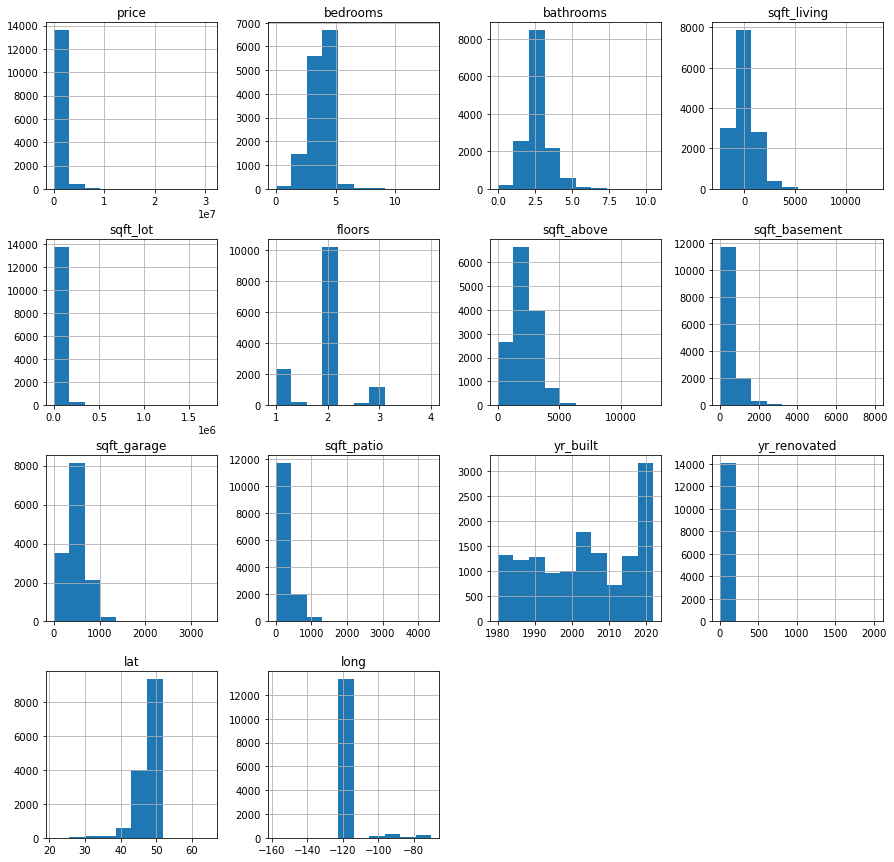

In [8]:
data.hist(figsize=(15,15))

In [9]:
# Look at correlations and identify a highly correlated predictor to create the baseline model
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
price,1.000000,0.311298,0.526474,0.636430,0.116989,0.048744,0.570230,0.285834,0.344209,0.334026,0.053166,0.041784,0.091238,-0.055513
bedrooms,0.311298,1.000000,0.619485,0.661285,0.034702,-0.037573,0.630830,0.154321,0.418674,0.139828,0.036271,-0.017706,0.189695,-0.191447
bathrooms,0.526474,0.619485,1.000000,0.752938,0.071858,0.094340,0.650271,0.373307,0.384799,0.269207,0.180980,-0.002978,0.102793,-0.093725
sqft_living,0.636430,0.661285,0.752938,1.000000,0.198940,0.017662,0.922170,0.342268,0.601975,0.358246,0.065235,0.001959,0.199871,-0.188012
sqft_lot,0.116989,0.034702,0.071858,0.198940,1.000000,-0.104361,0.193132,0.061850,0.183863,0.241839,-0.136658,0.011112,0.059307,-0.060282
floors,0.048744,-0.037573,0.094340,0.017662,-0.104361,1.000000,0.112070,-0.226958,-0.238592,0.003257,0.506321,-0.032727,-0.193877,0.209389
sqft_above,0.570230,0.630830,0.650271,0.922170,0.193132,0.112070,1.000000,-0.008220,0.630146,0.268468,0.088471,-0.001848,0.213945,-0.206252
sqft_basement,0.285834,0.154321,0.373307,0.342268,0.061850,-0.226958,-0.008220,1.000000,0.125199,0.273808,-0.048933,0.006273,0.013433,-0.000658
sqft_garage,0.344209,0.418674,0.384799,0.601975,0.183863,-0.238592,0.630146,0.125199,1.000000,0.177232,-0.256262,-0.001333,0.252805,-0.259087
sqft_patio,0.334026,0.139828,0.269207,0.358246,0.241839,0.003257,0.268468,0.273808,0.177232,1.000000,-0.024253,0.017428,0.002877,0.004411


In [10]:
# Import statsmodels for regression analysis
import statsmodels.api as sm
# Create a baseline model with 'price' as the dependent variable and 'sqft_living' as independent variable
y=data['price']
X=data[['sqft_living']]
baseline=sm.OLS(y, sm.add_constant(X))
baseline_results=baseline.fit()
# Display baseline model's summary statistics
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     9616.
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:33:54   Log-Likelihood:            -2.1177e+05
No. Observations:               14126   AIC:                         4.235e+05
Df Residuals:                   14124   BIC:                         4.236e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.223e+06   6600.198    185.237      

In [11]:
# Interpret the results
"""Only 37% of the variation is explained by the baseline model. However, the p-values for the y-intercept and sqft_living are statistically significant. The overall model is also statistically significant as its p-value is less than 0.05. The coefficient for sqft_living indicates that every unit increase of living area SF results in a $560 increase in home value. The JB value suggests that the relationship between the two variables is not normally distributed."""

'Only 37% of the variation is explained by the baseline model. However, the p-values for the y-intercept and sqft_living are statistically significant. The overall model is also statistically significant as its p-value is less than 0.05. The coefficient for sqft_living indicates that every unit increase of living area SF results in a $560 increase in home value. The JB value suggests that the relationship between the two variables is not normally distributed.'

Text(0.5, 1.0, 'Baseline Model Visualization')

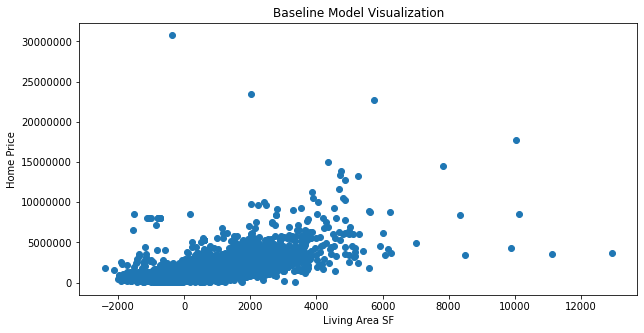

In [12]:
# Visualize the baseline model
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X, y)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.set_xlabel("Living Area SF")
ax.set_ylabel("Home Price")
ax.set_title("Baseline Model Visualization")

In [13]:
# Expand simple linear regression baseline model to a multiple linear regression model
# Add another numerical predictor ('bathrooms')
X_second = data[['sqft_living', 'bathrooms']]
X_second

,sqft_living,bathrooms
id,,
1604601802,-257.532352,3.0
8562780790,-1297.532352,2.0
7137850210,-203.532352,2.5
2944500680,-77.532352,2.5
2619950340,562.467648,2.5
...,...,...
6142050730,682.467648,3.5
9376300851,-1147.532352,2.5
194000695,-397.532352,2.0


In [14]:
# Create the second model
second=sm.OLS(y, sm.add_constant(X_second))
second_results=second.fit()
print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     4911.
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:33:54   Log-Likelihood:            -2.1171e+05
No. Observations:               14126   AIC:                         4.234e+05
Df Residuals:                   14123   BIC:                         4.234e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.317e+05   3.58e+04     23.250      

In [15]:
# Create a dataframe of home grades to inspect values
grade_data=data['grade'].copy()
grade_data=pd.get_dummies(grade_data, columns=['grade'])
grade_data

,10 Very Good,11 Excellent,12 Luxury,13 Mansion,2 Substandard,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
id,,,,,,,,,,,
1604601802,0,0,0,0,0,0,0,0,0,0,1
8562780790,0,0,0,0,0,0,0,0,1,0,0
7137850210,0,0,0,0,0,0,0,0,0,1,0
2944500680,0,0,0,0,0,0,0,0,0,1,0
2619950340,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6142050730,0,0,0,0,0,0,0,0,0,1,0
9376300851,0,0,0,0,0,0,0,0,0,1,0
194000695,0,0,0,0,0,0,0,0,1,0,0


In [16]:
# Create another dataframe with the categorical predictor 'grade' and conduct one-hot-encoding
X_third=data[['sqft_living', 'bathrooms', 'grade']]
X_third=pd.get_dummies(X_third, columns=['grade'])
# Drop 'grade_7 Average' to make it the reference category
X_third.drop(columns=['grade_7 Average'], inplace=True)
X_third

,sqft_living,bathrooms,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better
id,,,,,,,,,,,,
1604601802,-257.532352,3.0,0,0,0,0,0,0,0,0,0,1
8562780790,-1297.532352,2.0,0,0,0,0,0,0,0,0,0,0
7137850210,-203.532352,2.5,0,0,0,0,0,0,0,0,1,0
2944500680,-77.532352,2.5,0,0,0,0,0,0,0,0,1,0
2619950340,562.467648,2.5,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6142050730,682.467648,3.5,0,0,0,0,0,0,0,0,1,0
9376300851,-1147.532352,2.5,0,0,0,0,0,0,0,0,1,0
194000695,-397.532352,2.0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Create the third model with 'grade' as the sole categorical predictor
third=sm.OLS(y, sm.add_constant(X_third))
third_results=third.fit()
print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:33:54   Log-Likelihood:            -2.1041e+05
No. Observations:               14126   AIC:                         4.208e+05
Df Residuals:                   14113   BIC:                         4.209e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.509e+05   3

In [18]:
# Interpret the results of the third model
'''Homes with grades 2 to 6 inclusive are not statistically significant, as p-values are <0.05. This suggests that for homes of substandard to low average quality, there is an insignificant impact on the selling price, which makes sense in this scenario. Since we dropped grade_7 Average and used it as the reference category, the model indicates that a home with an average grade sells for around $274K (the constant) and a unit increase in sqft_living and sqft_patio increases the value of an average home by $296 and $215, respectively. 46.4% of the variance in home selling price is explained by the third model, which is an improvement from the first two regressions run. However, the R-squared value is still below 0.500, hence it is likely the relationship is not linear.'''

'Homes with grades 2 to 6 inclusive are not statistically significant, as p-values are <0.05. This suggests that for homes of substandard to low average quality, there is an insignificant impact on the selling price, which makes sense in this scenario. Since we dropped grade_7 Average and used it as the reference category, the model indicates that a home with an average grade sells for around $274K (the constant) and a unit increase in sqft_living and sqft_patio increases the value of an average home by $296 and $215, respectively. 46.4% of the variance in home selling price is explained by the third model, which is an improvement from the first two regressions run. However, the R-squared value is still below 0.500, hence it is likely the relationship is not linear.'

In [19]:
# Additional one-hot-encoding with two more categorical variables ('waterfront' and 'sewer_system')
X_fourth=data[['sqft_living', 'bathrooms', 'grade', 'waterfront', 'sewer_system']]
X_fourth=pd.get_dummies(X_fourth, columns=['grade', 'waterfront', 'sewer_system'])
# Drop the columns below to make them the reference category
X_fourth.drop(columns=['grade_7 Average', 'waterfront_NO','sewer_system_PUBLIC'], inplace=True)
fourth=sm.OLS(y, sm.add_constant(X_fourth))
fourth_results=fourth.fit()
print(fourth_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     1018.
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:33:54   Log-Likelihood:            -2.1002e+05
No. Observations:               14126   AIC:                         4.201e+05
Df Residuals:                   14109   BIC:                         4.202e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [20]:
# Interpret results of the fourth model
'''The fourth model accounts for ~50% of the variance in sale price and models against a reference home with the following features: (1) average grade; (2) no waterfront; and (3) a public sewer system. Based on the constant coefficient, a home with the aforementioned features can be expected to have a sale price around $294K. Similar to the third model, homes with grade 2-6 have no statistically significant impact on sale price compared to a home with an average grade of 7. With the additional variables, homes with restricted sewer systems also lack a statistically significant impact. Of the additional variables, waterfront_YES and sewer_system_PRIVATE have p-values < 0.05, and they are associated with a $1.2M and -$225K change in sale price, respectively. Overall, the fourth model only accounts for slightly more variance compared to the third.'''

'The fourth model accounts for ~50% of the variance in sale price and models against a reference home with the following features: (1) average grade; (2) no waterfront; and (3) a public sewer system. Based on the constant coefficient, a home with the aforementioned features can be expected to have a sale price around $294K. Similar to the third model, homes with grade 2-6 have no statistically significant impact on sale price compared to a home with an average grade of 7. With the additional variables, homes with restricted sewer systems also lack a statistically significant impact. Of the additional variables, waterfront_YES and sewer_system_PRIVATE have p-values < 0.05, and they are associated with a $1.2M and -$225K change in sale price, respectively. Overall, the fourth model only accounts for slightly more variance compared to the third.'

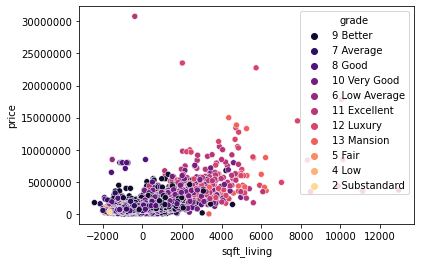

In [21]:
# Visualize 'sqft_living' vs. 'price' and make the color hues based on 'grade' using seaborn
import seaborn as sns
sns.scatterplot(x=data['sqft_living'], y=data['price'], hue=data['grade'], data=data, palette='magma')
plt.ticklabel_format(style='plain', axis='y')

In [22]:
'''Based on the visualization, homes with low grades tend to be clustered around the bottom left of the graph while homes with higher grades are more spread out, displaying a more positive relationship between living area and price. The visualization supports the summary statistics in the fourth model, which indicate that homes with low grades are statistically insignificant on home prices.'''

'Based on the visualization, homes with low grades tend to be clustered around the bottom left of the graph while homes with higher grades are more spread out, displaying a more positive relationship between living area and price. The visualization supports the summary statistics in the fourth model, which indicate that homes with low grades are statistically insignificant on home prices.'

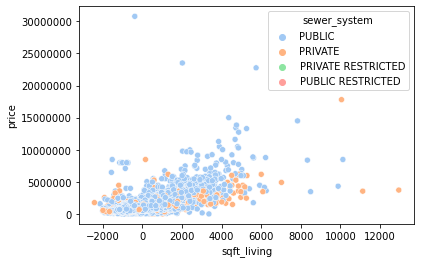

In [23]:
# The same visualization is run, with hues based on 'sewer_system'
sns.scatterplot(x=data['sqft_living'], y=data['price'], hue=data['sewer_system'], data=data, palette='pastel')
plt.ticklabel_format(style='plain', axis='y')

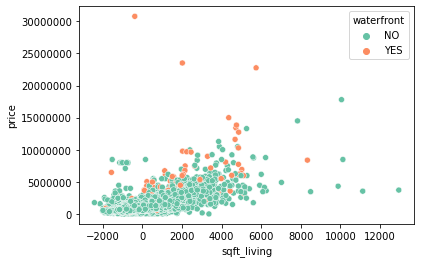

In [24]:
# The same visualization is run, with hues based on 'waterfront'
sns.scatterplot(x=data['sqft_living'], y=data['price'], hue=data['waterfront'], data=data, palette='Set2')
plt.ticklabel_format(style='plain', axis='y')

In [25]:
# Summary of regressions that have been run
summary_table=pd.DataFrame({'Model': [], 'Independent Variables':[], 'R-squared':[],
                                'Adj R-squared':[]})
summary_table.loc[0]=('Baseline Model', 'sqft_living', baseline_results.rsquared, baseline_results.rsquared_adj)
summary_table.loc[1]=('Second Model', 'sqft_living, bathrooms', second_results.rsquared, second_results.rsquared_adj)
summary_table.loc[2]=('Third Model', 'sqft_living, bathrooms, grade', third_results.rsquared, third_results.rsquared_adj)
summary_table.loc[3]=('Fourth Model', 'sqft_living, bathrooms, grade, waterfront, sewer_system', fourth_results.rsquared, fourth_results.rsquared_adj)
pd.set_option('max_colwidth', 90)
summary_table

,Model,Independent Variables,R-squared,Adj R-squared
0,Baseline Model,sqft_living,0.405043,0.405001
1,Second Model,"sqft_living, bathrooms",0.410205,0.410121
2,Third Model,"sqft_living, bathrooms, grade",0.509554,0.509137
3,Fourth Model,"sqft_living, bathrooms, grade, waterfront, sewer_system",0.535744,0.535218


In [26]:
X_no_interaction = data[['sqft_living', 'grade', 'bathrooms', 'waterfront', 'sewer_system']].copy()
X_no_interaction = pd.get_dummies(X_no_interaction, columns=['grade', 'waterfront', 'sewer_system'])
X_no_interaction.drop(columns=['grade_7 Average', 'waterfront_NO','sewer_system_PUBLIC'], inplace=True)
X_interaction=X_no_interaction.copy()
X_interaction["sqft_living x sewer_system_PRIVATE"] = X_interaction["sewer_system_PRIVATE"] * X_interaction["sqft_living"]
X_interaction["sqft_living x bathrooms"] = X_interaction["sqft_living"] * X_interaction["bathrooms"]
X_interaction["sqft_living x grade_8 Good"] = X_interaction["sqft_living"] * X_interaction["grade_8 Good"]
X_interaction["sqft_living x waterfront_YES"] = X_interaction["sqft_living"] * X_interaction["waterfront_YES"]
X_interaction

,sqft_living,bathrooms,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better,waterfront_YES,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC RESTRICTED,sqft_living x sewer_system_PRIVATE,sqft_living x bathrooms,sqft_living x grade_8 Good,sqft_living x waterfront_YES
id,,,,,,,,,,,,,,,,,,,,
1604601802,-257.532352,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.0,-772.597055,-0.000000,-0.0
8562780790,-1297.532352,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0,-2595.064703,-0.000000,-0.0
7137850210,-203.532352,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.0,-508.830879,-203.532352,-0.0
2944500680,-77.532352,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.0,-193.830879,-77.532352,-0.0
2619950340,562.467648,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,1406.169121,562.467648,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142050730,682.467648,3.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,2388.636769,682.467648,0.0
9376300851,-1147.532352,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.0,-2868.830879,-1147.532352,-0.0
194000695,-397.532352,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0,-795.064703,-0.000000,-0.0


In [27]:
interaction_model = sm.OLS(y, sm.add_constant(X_interaction))
interaction_results = interaction_model.fit()
pvalues_df = pd.DataFrame(interaction_results.pvalues, columns=["p-value"])
pvalues_df["p < 0.05"] = pvalues_df["p-value"] < 0.05
pvalues_df

,p-value,p < 0.05
const,4.045098e-92,True
sqft_living,4.581560e-24,True
bathrooms,1.429668e-10,True
grade_10 Very Good,2.428480e-161,True
grade_11 Excellent,3.819078e-228,True
grade_12 Luxury,1.268352e-172,True
grade_13 Mansion,4.920099e-74,True
grade_2 Substandard,5.132382e-01,False
grade_4 Low,3.116971e-01,False
grade_5 Fair,9.438450e-01,False


In [28]:
X_interaction2=X_interaction.copy()
X_interaction2=X_interaction2.drop(columns=['sqft_living x sewer_system_PRIVATE'])
X_interaction2

,sqft_living,bathrooms,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better,waterfront_YES,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC RESTRICTED,sqft_living x bathrooms,sqft_living x grade_8 Good,sqft_living x waterfront_YES
id,,,,,,,,,,,,,,,,,,,
1604601802,-257.532352,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-772.597055,-0.000000,-0.0
8562780790,-1297.532352,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2595.064703,-0.000000,-0.0
7137850210,-203.532352,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-508.830879,-203.532352,-0.0
2944500680,-77.532352,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-193.830879,-77.532352,-0.0
2619950340,562.467648,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1406.169121,562.467648,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142050730,682.467648,3.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2388.636769,682.467648,0.0
9376300851,-1147.532352,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-2868.830879,-1147.532352,-0.0
194000695,-397.532352,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-795.064703,-0.000000,-0.0


In [29]:
interaction2_model=sm.OLS(y, sm.add_constant(X_interaction2))
interaction2_results=interaction2_model.fit()
pvalues_df = pd.DataFrame(interaction2_results.pvalues, columns=["p-value"])
pvalues_df["p < 0.05"] = pvalues_df["p-value"] < 0.05
pvalues_df

,p-value,p < 0.05
const,3.620823e-81,True
sqft_living,8.510236e-20,True
bathrooms,1.074941e-14,True
grade_10 Very Good,2.208494e-155,True
grade_11 Excellent,3.326972e-218,True
grade_12 Luxury,3.572432e-169,True
grade_13 Mansion,5.457116e-68,True
grade_2 Substandard,8.750633e-01,False
grade_4 Low,8.668794e-01,False
grade_5 Fair,2.017202e-01,False


In [30]:
print(interaction2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     913.8
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:33:56   Log-Likelihood:            -2.0977e+05
No. Observations:               14126   AIC:                         4.196e+05
Df Residuals:                   14106   BIC:                         4.197e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     